In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

### [Q1, 6 points] Create a unique name for each restaurant

In [3]:
df['RESTAURANT'] = df['DBA']+ ' ' + df['BUILDING']+ ' ' + df['STREET']+ ' ' + df['ZIPCODE']+ ' ' + df['BORO'] 
df.loc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

### [Q2, 6 points] How many restaurants are included in the data?

In [4]:
len(df['RESTAURANT'].drop_duplicates())

10114

### [Q3, 6 points] How many chains are there?

In [5]:
mask = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts() > 1
resturaunts = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chains = resturaunts[mask]
len(chains)

368

### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

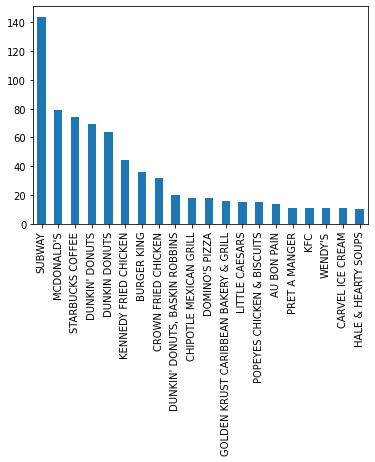

In [6]:
chains.iloc[:20].plot(kind = 'bar')

### [Q5, 6 points] What fraction of all restaurants are chain restaurants?

In [7]:
sum(chains) / sum(resturaunts)

0.16472216729286138

### [Q6, 6 points] Plot the number of non-chain restaurants in each boro

<AxesSubplot:>

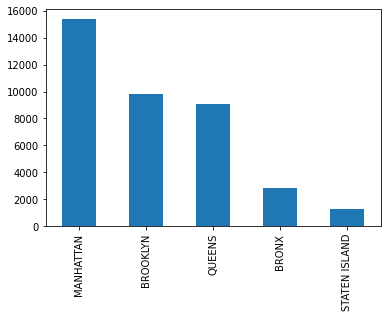

In [8]:
mask = (df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts() == 1)

non_chains = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()[mask]

mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan

df[df['DBA'].isin(non_chains.keys())]['BORO'].value_counts().plot(kind = 'bar')

### [Q7, 8 points] Plot the fraction of non-chain restaurants in each boro.

<AxesSubplot:>

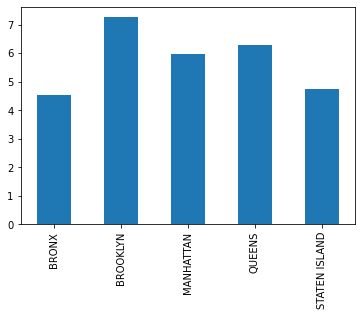

In [9]:
(df[df['DBA'].isin(non_chains.keys())]['BORO'].value_counts() / df[~df['DBA'].isin(non_chains.keys())]['BORO'].value_counts()).plot(kind = 'bar')

### [Q8, 6 points] Plot the popularity of cuisines.

<AxesSubplot:>

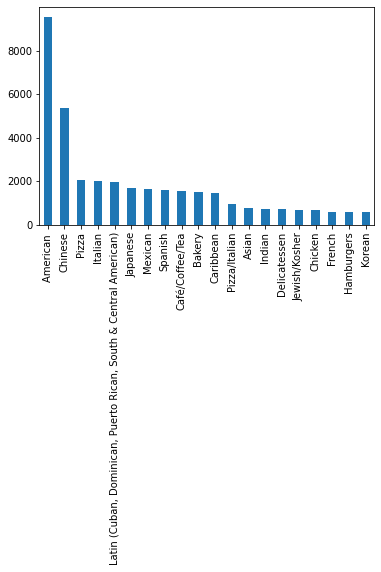

In [10]:
df['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

### [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.

<AxesSubplot:>

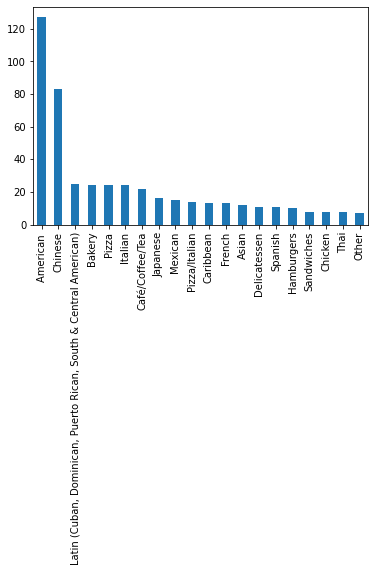

In [16]:
clean_mask = df['VIOLATION CODE'].isnull()
df[clean_mask]['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')
# df['ACTION'][mask].value_counts()[:20].plot(kind = 'bar')

### [Q10, 6 points] What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.

• For each such cuisine, compute the ratio of the counts in Q9 to Q8.
This is the ratio of restaurants that never got cited, versus total number
of restaurants, for each cuisine.

• Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.”

In [104]:
# mask = (df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts() >20)
# print(mask)
# big_cuisines = df[mask][['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION']

#clean_resturaunts = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['RESTAURANT'][clean_mask]

#cuisine_ratios = df[df['RESTAURANT'].isin(clean_resturaunts)]['CUISINE DESCRIPTION'].value_counts() / df[['RESTAURANT', 'CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()




American               True
Chinese                True
Café/Coffee/Tea        True
Pizza                  True
Italian                True
                      ...  
Scandinavian          False
Nuts/Confectionary    False
Californian           False
Hawaiian              False
Iranian               False
Name: CUISINE DESCRIPTION, Length: 79, dtype: bool


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).